## Classification using Tensorflow

Convolutional Neural Networks are the best thing around for images now, let's use them and compare to before 

Digits have 10 possible categories 

I'm not spending much time trying to decide on the number of layers and units - I could use validation sets to try picking better ones but I just want to demonstrate to you some of the features of the library

So the targets are the numbers 
0,1,2,3,4,5,6,7,8,9 - 10 possible classes

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

Load in the dataset as before

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images.shape

(10000, 28, 28)

I want each image as a 28x28x1 so that it's a 3d "volume"

In [3]:
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
test_images.shape

(10000, 28, 28, 1)

In [4]:
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
train_images.shape

(60000, 28, 28, 1)

We're not going to use train_test_split as tf.keras has already divided the images for us

In [5]:
np.max(train_images)

255

8-bit images too, the values go from 0-255.

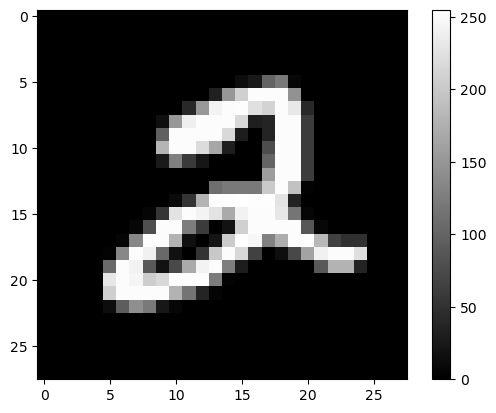

2


In [6]:
plt.figure()
plt.imshow(train_images[5], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[5])

matplotlib works fine with the values from 0-255 or from 0-1 for grayscale. 

I want to convert them all between 0-1 (I could have done this in the previous example but I'm doing it now)

0-1 tends to work better. I am <b>not</b> using StandardScaler, I am just dividing by 255 as before

We should build this into the model. The below will give us a new layer we can use

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
img_height = train_images[0].shape[0]
img_width = train_images[0].shape[1]
print("Height: ", img_height, ", Width: ", img_width)

Height:  28 , Width:  28


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 12)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 10)                23530     
                                                                 
Total params: 23650 (92.38 KB)
Trainable params: 23650 (92.38 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.3135 - accuracy: 0.9128 - val_loss: 0.1456 - val_accuracy: 0.9597
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1202 - accuracy: 0.9653 - val_loss: 0.0999 - val_accuracy: 0.9732
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0847 - accuracy: 0.9752 - val_loss: 0.0808 - val_accuracy: 0.9778
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0687 - accuracy: 0.9795 - val_loss: 0.0764 - val_accuracy: 0.9784
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.0679 - val_accuracy: 0.9812
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0722 - val_a

This should be higher than the previously fully connected ANN.

We could get training accuracy up further with more epochs, but that might be overfitting, let's analyse this first though.

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

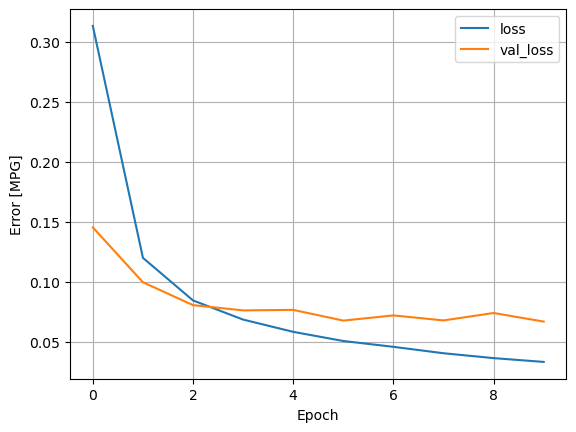

In [14]:
plot_loss(history)

The plot is diverging between val_loss and loss so might be some overfitting here, maybe should have used early stopping or chosen different hyperparameters

In [15]:
model.evaluate(test_images, test_labels, return_dict=True)

313/313 [==============================] - 2s 6ms/step - loss: 0.0596 - accuracy: 0.9809


{'loss': 0.05958561226725578, 'accuracy': 0.98089998960495}

0.9717 was the score for the previous fully dense. So an improvement alright, but this is an extremely basic CNN, and the images were greyscale, CNN would do much much better with RGB than dense networks

### Early stopping
Using patience=3 to see if no improvement after 3 steps

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback])   ##Adding my early stopping here

Epoch 1/100
1500/1500 [==============================] - 18s 11ms/step - loss: 0.3174 - accuracy: 0.9115 - val_loss: 0.1574 - val_accuracy: 0.9572
Epoch 2/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1331 - accuracy: 0.9613 - val_loss: 0.1155 - val_accuracy: 0.9672
Epoch 3/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0987 - accuracy: 0.9710 - val_loss: 0.0950 - val_accuracy: 0.9742
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0807 - accuracy: 0.9762 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0773 - val_accuracy: 0.9786
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0731 - val_accuracy: 0.9794
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0704 

Patience of 3 might be too little

In [19]:
model.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9806


{'loss': 0.06448017805814743, 'accuracy': 0.9805999994277954}

## Problem with early stopping and patience

With patience set to 3, we don't actually get the "best" model, the one with the lowest validation loss, we get the model 3 epochs after the best one!

So we can use another callback to save the "best" model if we want. 

`ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)`

will do this

In [20]:
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [21]:
callback_modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, save_format='h5')

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 1)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(12, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback_earlystop, callback_modelcheckpoint])

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3515 - accuracy: 0.9004 - val_loss: 0.1903 - val_accuracy: 0.9469
Epoch 2/100
  17/1500 [..............................] - ETA: 9s - loss: 0.2641 - accuracy: 0.9228

C:\Users\BMcGinley\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 7ms/step - loss: 0.1540 - accuracy: 0.9561 - val_loss: 0.1132 - val_accuracy: 0.9697
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0970 - accuracy: 0.9725 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 4/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0752 - accuracy: 0.9780 - val_loss: 0.0848 - val_accuracy: 0.9747
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0699 - val_accuracy: 0.9799
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 8/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0689 - val_accuracy

In [24]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [25]:
model.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9812


{'loss': 0.06165913864970207, 'accuracy': 0.9811999797821045}

In [26]:
saved_model.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9804


{'loss': 0.06136053428053856, 'accuracy': 0.980400025844574}

## Now let's do a "deeper" model"

In [27]:
num_classes = 10

In [28]:
model2 = tf.keras.models.Sequential([
  tf.keras.Input(shape=(img_height, img_width, 1)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [29]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model2.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[callback_earlystop, callback_modelcheckpoint])

Epoch 1/100
1500/1500 [==============================] - 21s 13ms/step - loss: 0.1847 - accuracy: 0.9419 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 2/100
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 3/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0374 - accuracy: 0.9878 - val_loss: 0.0443 - val_accuracy: 0.9864
Epoch 4/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0426 - val_accuracy: 0.9871
Epoch 5/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 6/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 7/100
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0

In [31]:
saved_model2 = load_model('best_model.h5')

In [32]:
saved_model2.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9901


{'loss': 0.035920776426792145, 'accuracy': 0.9901000261306763}

In [33]:
model2.evaluate(test_images,test_labels, return_dict=True)

313/313 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9853


{'loss': 0.04952801391482353, 'accuracy': 0.9853000044822693}

Over 99% accuracy on the test set. That's quite good! Although, take note that just because a network is deeper and more complicated does not mean it will perform better. How deep a network is etc is a hyperparameter so it can make the model better or worse like all hyperparameters

You may notice that the number of parameters is less than the dense network done previously